# **Calorie Burn Prediction Engine**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
calories = pd.read_csv(r'C:\Users\gtiwa\OneDrive\Desktop\Ai\JUPYTER\STREAMLITCALORIES\calories.csv')
exercise = pd.read_csv(r'C:\Users\gtiwa\OneDrive\Desktop\Ai\JUPYTER\STREAMLITCALORIES\exercise.csv')

In [ ]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:

df = exercise.merge(calories, on='User_ID')

# Using the merge() function we have merged both the datasets - Calories & Exercise , which can be seen in the below given table

In [ ]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


# It is a **SUPERVISED PROBLEM** (as we have the labelled data here)
# Among Supervised Learning ,there are 2 types of problems --> CLASSIFICATION & REGRESSION.
# This is a **REGRESSION PROBLEM** as here we have definite values i.e. the CALORIES BURNT .


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
df.shape

(15000, 9)

In [ ]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# **UNIVARIATE ANALYSIS**

<Axes: xlabel='count', ylabel='Gender'>

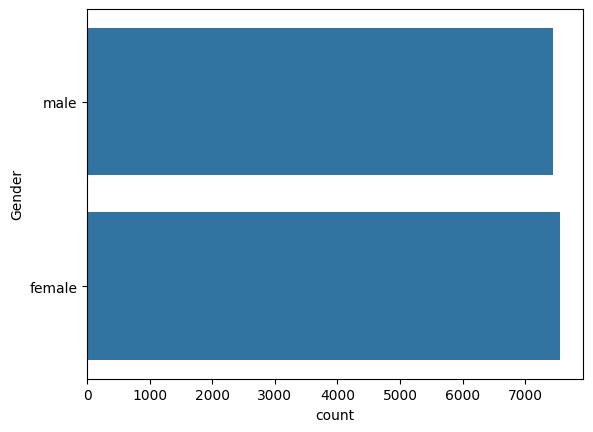

In [ ]:
sns.countplot(df['Gender'])

In [ ]:
df['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

# histogram (numerical to numerical)

Text(0, 0.5, 'number of people')

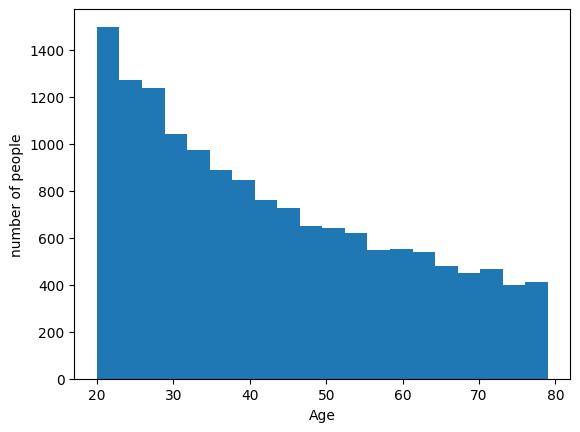

In [ ]:
plt.hist(df['Age'],bins=20)
plt.xlabel('Age')
plt.ylabel('number of people')

(array([7447.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 7553.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

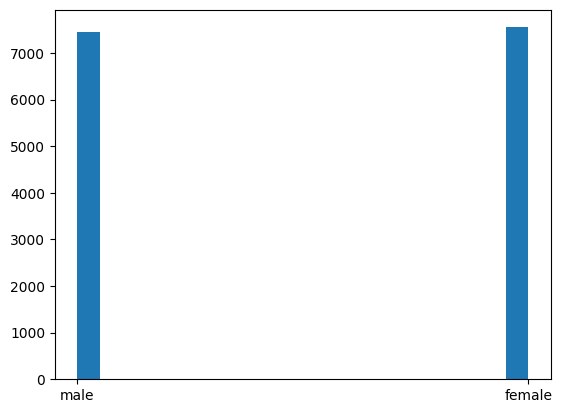

In [ ]:
plt.hist(df['Gender'],bins=20)

(array([  11.,   78.,  357.,  904., 1230., 1776., 1774., 1506., 1514.,
        1215., 1452., 1319.,  924.,  534.,  213.,  130.,   42.,   14.,
           5.,    2.]),
 array([ 36. ,  40.8,  45.6,  50.4,  55.2,  60. ,  64.8,  69.6,  74.4,
         79.2,  84. ,  88.8,  93.6,  98.4, 103.2, 108. , 112.8, 117.6,
        122.4, 127.2, 132. ]),
 <BarContainer object of 20 artists>)

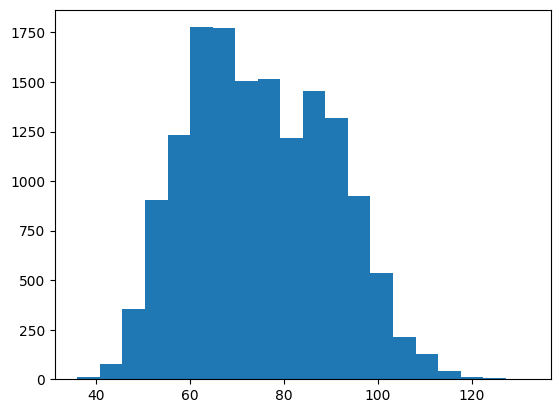

In [ ]:
plt.hist(df['Weight'],bins=20)

(array([  15.,   51.,  176.,  406.,  744., 1125., 1324., 1582., 1554.,
        1557., 1539., 1493., 1306., 1035.,  625.,  321.,  114.,   26.,
           4.,    3.]),
 array([ 67.  ,  70.05,  73.1 ,  76.15,  79.2 ,  82.25,  85.3 ,  88.35,
         91.4 ,  94.45,  97.5 , 100.55, 103.6 , 106.65, 109.7 , 112.75,
        115.8 , 118.85, 121.9 , 124.95, 128.  ]),
 <BarContainer object of 20 artists>)

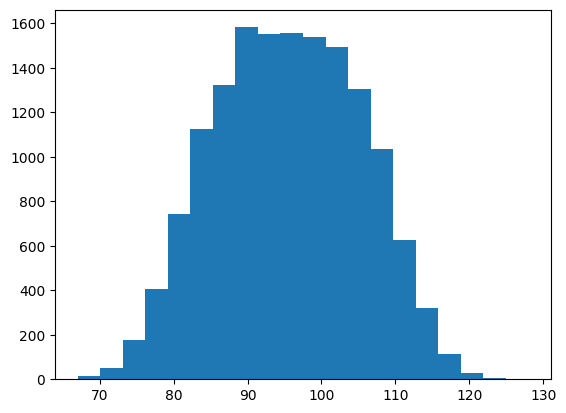

In [ ]:
plt.hist(df['Heart_Rate'],bins=20)

(array([  11.,   39.,   87.,  144.,  179.,  310.,  316.,  373.,  415.,
         602., 1084.,  897., 1078., 1393., 1728., 2982., 1942., 1058.,
         306.,   56.]),
 array([37.1 , 37.32, 37.54, 37.76, 37.98, 38.2 , 38.42, 38.64, 38.86,
        39.08, 39.3 , 39.52, 39.74, 39.96, 40.18, 40.4 , 40.62, 40.84,
        41.06, 41.28, 41.5 ]),
 <BarContainer object of 20 artists>)

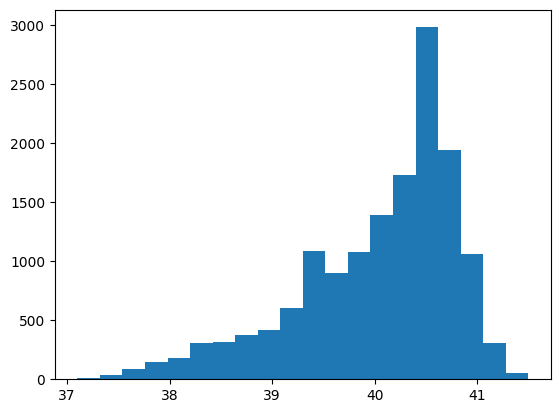

In [ ]:
plt.hist(df['Body_Temp'],bins=20)

(array([ 709.,  511., 1042.,  533., 1023.,  517., 1067.,  512., 1045.,
         527.,  546., 1057.,  521., 1024.,  505., 1006.,  526., 1050.,
         541.,  738.]),
 array([ 1.  ,  2.45,  3.9 ,  5.35,  6.8 ,  8.25,  9.7 , 11.15, 12.6 ,
        14.05, 15.5 , 16.95, 18.4 , 19.85, 21.3 , 22.75, 24.2 , 25.65,
        27.1 , 28.55, 30.  ]),
 <BarContainer object of 20 artists>)

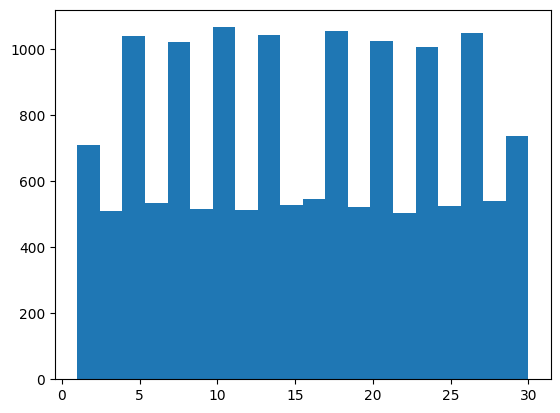

In [ ]:
plt.hist(df['Duration'],bins=20)

(array([1750., 1771., 1383., 1406., 1225., 1034., 1082.,  965.,  860.,
         904.,  798.,  656.,  523.,  326.,  153.,   98.,   49.,   11.,
           4.,    2.]),
 array([  1.  ,  16.65,  32.3 ,  47.95,  63.6 ,  79.25,  94.9 , 110.55,
        126.2 , 141.85, 157.5 , 173.15, 188.8 , 204.45, 220.1 , 235.75,
        251.4 , 267.05, 282.7 , 298.35, 314.  ]),
 <BarContainer object of 20 artists>)

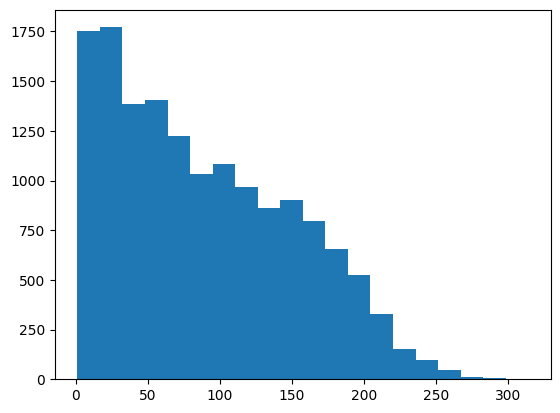

In [ ]:
plt.hist(df['Calories'],bins=20)

# **Bi or Multi Variate Analysis**

In [ ]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


#  scatter plot

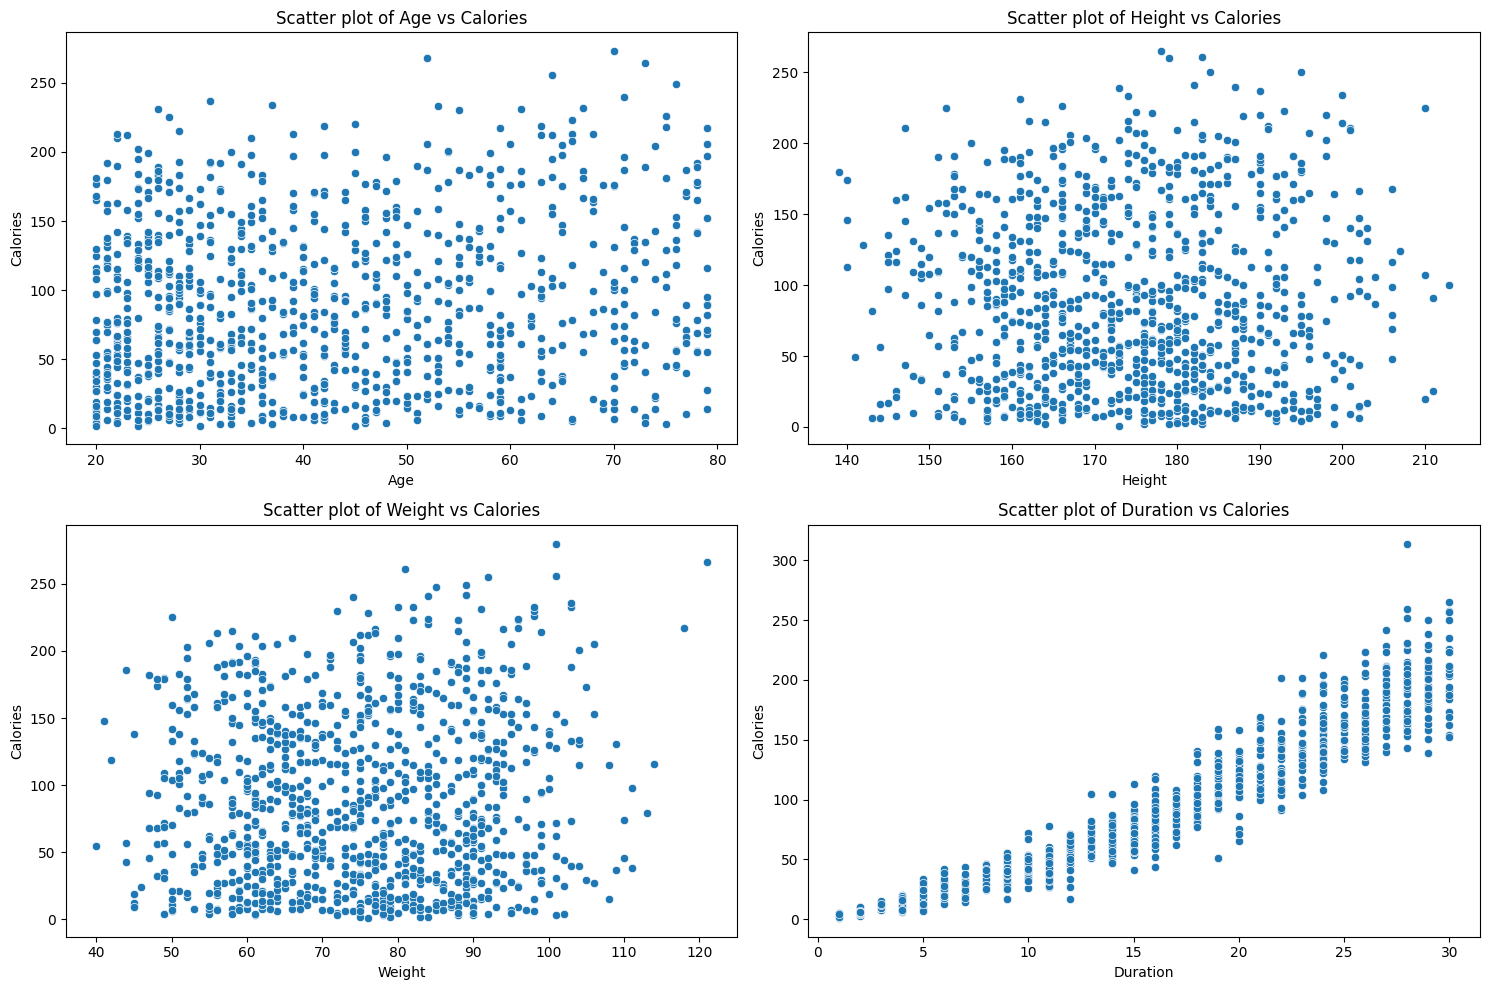

In [ ]:

# Define features
features = ['Age', 'Height', 'Weight', 'Duration']

# Create subplots with specified size
plt.figure(figsize=(15, 10))

# Loop through each feature and create a subplot
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    x = df.sample(1000)  # Sample 1000 rows from the DataFrame
    sns.scatterplot(data=x, x=col, y='Calories')
    plt.title(f'Scatter plot of {col} vs Calories')
    plt.xlabel(col)
    plt.ylabel('Calories')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#  scatter plot shows that there is no direct correlation between (age-calories burnt) , (height-calories burnt) , (weight-calories burnt)
#  But a direct relation between (Duration of exercise - calories burnt).

# Boxplot (Numerical to categorical)

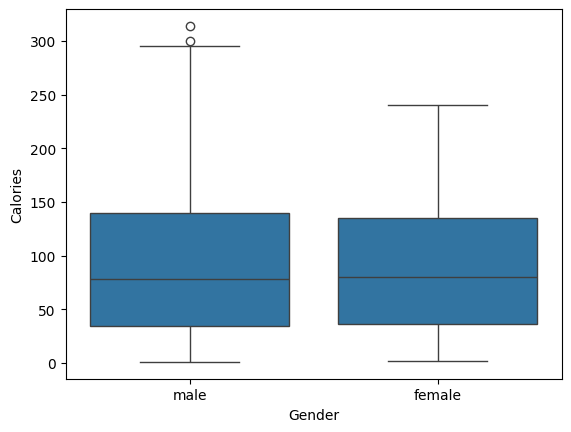

In [ ]:
sns.boxplot(data=df, x='Gender', y='Calories')
# Show plot
plt.show()

In [ ]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# **Line Plot** (numerical to numerical)

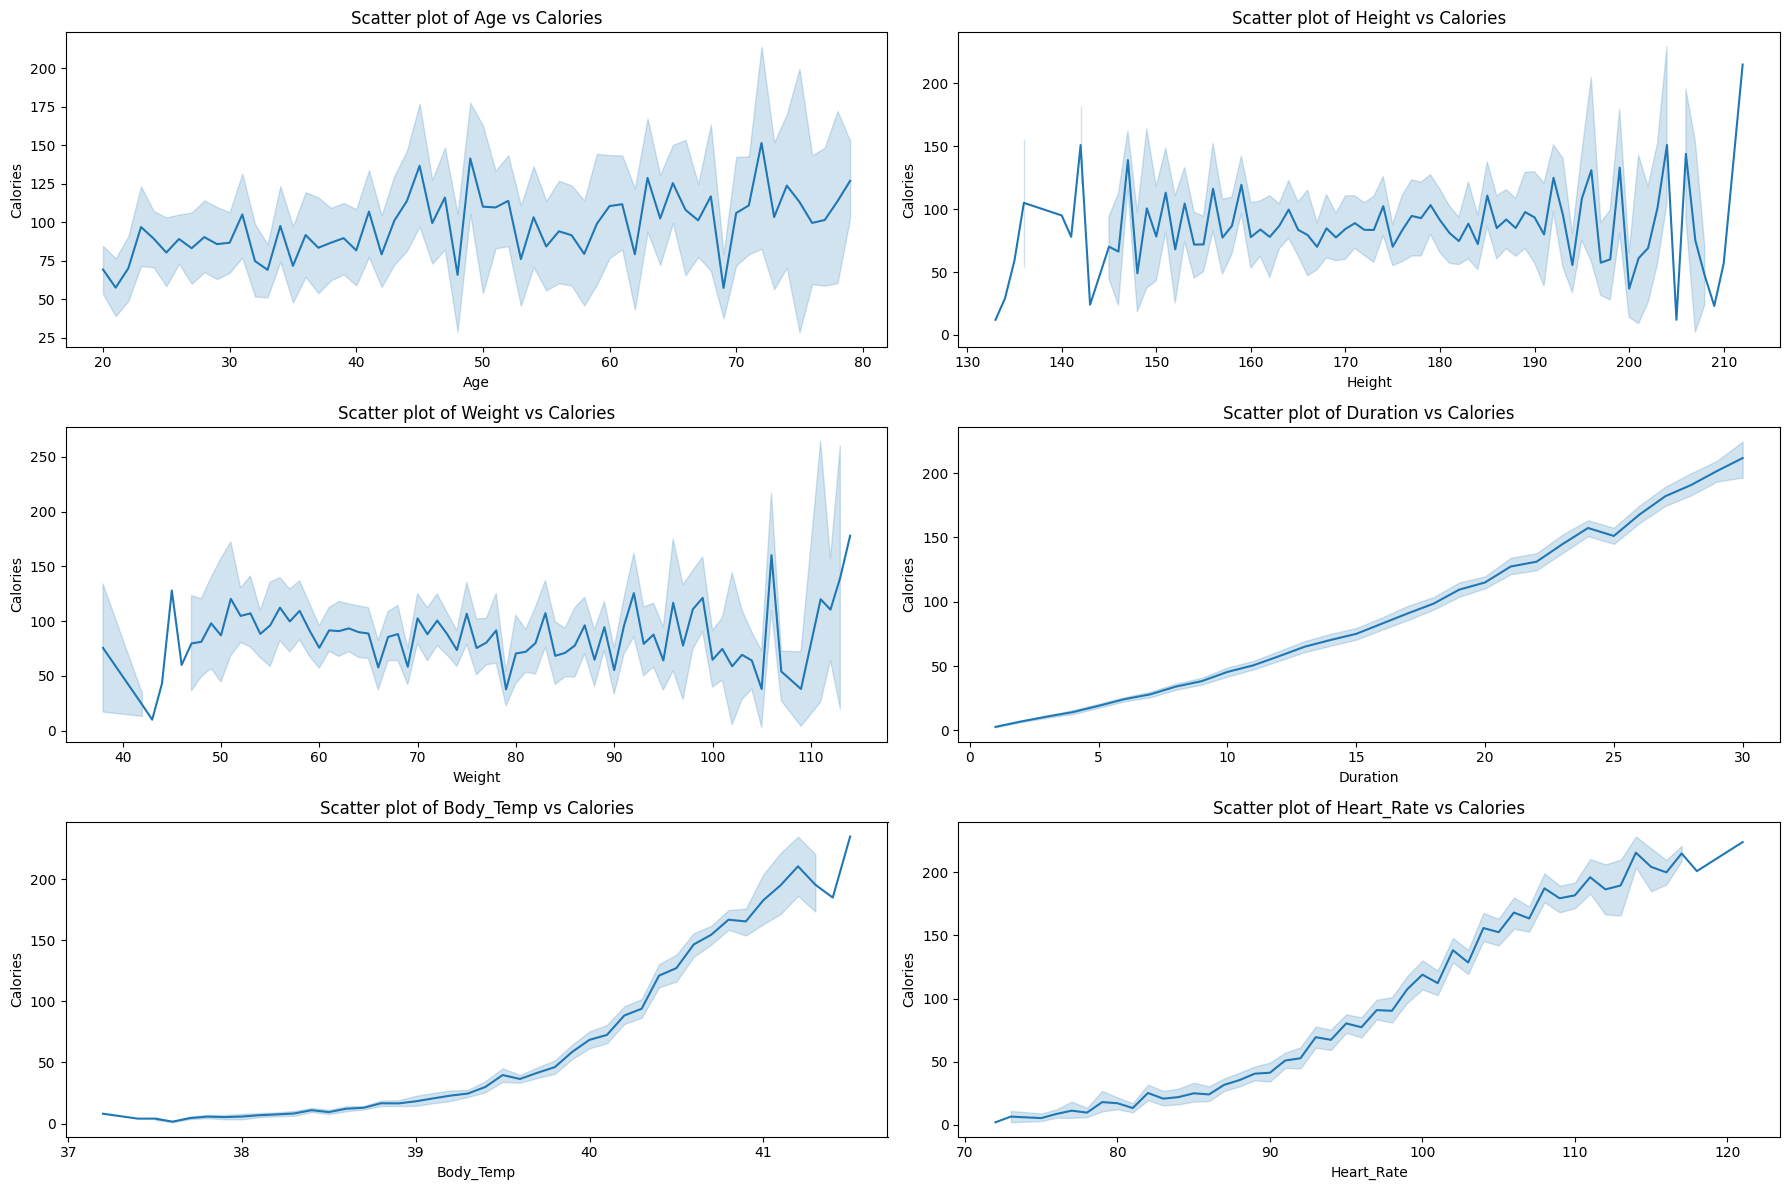

In [ ]:
# Define features
features = ['Age', 'Height', 'Weight', 'Duration','Body_Temp','Heart_Rate']

# Create subplots with specified size
plt.figure(figsize=(18, 12))

# Loop through each feature and create a subplot
for i, col in enumerate(features):
    plt.subplot(3, 2, i + 1)
    x = df.sample(1000)  # Sample 1000 rows from the DataFrame
    sns.lineplot(data=x, x=col, y='Calories')
    plt.title(f'Scatter plot of {col} vs Calories')
    plt.xlabel(col)
    plt.ylabel('Calories')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# **ENCODING**

In [ ]:
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})

In [ ]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


# **TRAIN TEST SPLIT**

In [ ]:
X = df.drop(['User_ID', 'Calories'], axis=1)
y = df['Calories']

In [ ]:
X.shape

(15000, 7)

In [ ]:
y.shape

(15000,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(12000, 7)

In [ ]:
X_test.shape

(3000, 7)

# **TRAINING MODEL**

## **Since it is a regression model so we calculate Score and Mean squared error**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
models = {
    'lr': LinearRegression(),
    'dtr': DecisionTreeRegressor(),
    'rfr': RandomForestRegressor()
}

In [ ]:
for name, mod in models.items():
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)

    print(f"{mod}  MSE: {mean_squared_error(y_test, y_pred)}, Score: {r2_score(y_test, y_pred)}")

LinearRegression()  MSE: 131.99574575081704, Score: 0.9672937151257295
DecisionTreeRegressor()  MSE: 26.562666666666665, Score: 0.9934182261854079
RandomForestRegressor()  MSE: 7.016465466666666, Score: 0.9982614400406775


## Now we will be **select that model** which has the **LEAST mean squared error** and **highest score** i.e. decision tree regression

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
y_pred



array([166., 182.,  52., ..., 123.,  20., 207.])

In [ ]:
import pickle

pickle.dump(dtr, open('dtr.pkl', 'wb'))

In [ ]:
X_train.to_csv('X_train.csv')